In [77]:
import numpy as np  #Importa libreria numerica 
import sympy as sym #simbolica
import matplotlib.pyplot as plt #importa matplotlib solo pyplot
import matplotlib.image as mpimg 
from sympy.plotting import plot  #para plotear 2 variables
from sympy.plotting import plot3d  # para 3
from sympy.plotting import plot3d_parametric_surface
from IPython.display import Image 
import ipympl  #Para importar gestor de imagenes 
sym.init_printing() #activa a jupyter para mostrar simbolicamente el output

%matplotlib widget
#%matplotlib inline

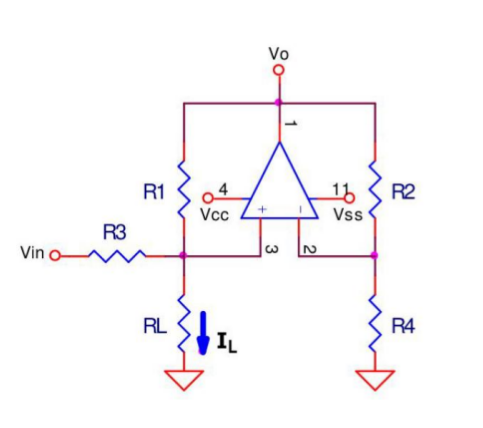

In [78]:
Image(filename='LAB1_2.png',width=300)  

In [79]:
Vin, Vo, V3, V2 = sym.symbols('V_{in}, V_o, V_+, V_-')
V2=V3
Ir1, Ir2, Ir3, Ir4 = sym.symbols('I_{R1}, I_{R2},I_{R3},I_{R4}')
R1, R2, R3, R4, RL = sym.symbols('R1, R2, R3, R4, R_{L}')

Irl = sym.Function('I_{R_L}')(Vin,RL) #Defino viarible simbolica Irl como una funcion de Vin y RL 
display(Irl)

#SUM(I) en nodo 3 (+) es CERO => 
eq_Irl = sym.Eq(Irl,Ir1+Ir3)
display(eq_Irl)


In [82]:
#La corriente en Ir1 es: (Vo-V+)/R1 = Irl - Ir3
# Ir3 = (Vin - V+)/R3
Ir1 = (Vo-V3)/R1
Ir3= (Vin - V3)/R3
eq_Irl = sym.Eq(Irl,Ir1+Ir3)
display(eq_Irl)
res=sym.solve(eq_Irl,(Vo-V3))
eq_Vo3=sym.Eq(Vo-V3,sym.expand(res[0]))
display(eq_Vo3)

In [83]:
#SUM(I) en nodo 2 (-) es CERO =>
eq_Ir2 = sym.Eq(Ir2,Ir4)
display(eq_Ir2)
Ir2 = (Vo-V3)/R2
Ir4= (V2)/R4
eq_Ir2 = sym.Eq(Ir2,Ir4)
display(eq_Ir2)
res2=sym.solve(eq_Ir2,(Vo-V3))
eq_Vo3_=sym.Eq(Vo-V3,sym.expand(res2[0]))
display(eq_Vo3_)

In [51]:
#Remplazando 
eq_=sym.Eq(eq_Vo3.rhs-eq_Vo3_.rhs)
display(eq_)

In [52]:
# Irl = V+/RL => V+=Irl/RL
# R1 = 100Ω; R2 = 10KΩ; R3 = 1KΩ y R4 = 100KΩ
res=sym.solve([eq_.subs({V3:Irl/RL,(R2/R4):(R1/R3)})],Irl)
display(res)

In [73]:
Vo= sym.Function('Vo')(Vin,RL) #Defino viarible simbolica Vo como una funcion de Vin y RL 
Irl= sym.Symbol('I_{RL}')
display(Vo)
display(eq_Vo3) #De esa ecuacion se remplaza V+= RL * Irl
display(sym.Eq(V3,RL*Irl))

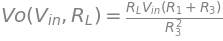

In [74]:
eq_Vo=sym.Eq(Vo,Irl*(RL+R1+RL*R1/R3)-Vin*(R1/R3))
display(eq_Vo)
#REMPLAZO DEL RESULTADO Irl(V1,RL)
display(sym.simplify((eq_Vo.subs(Irl,(Vin/R3)))))

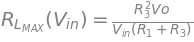

In [75]:
#RL MAX como VoMAX=10v
#R1 = 100Ω; R2 = 10KΩ; R3 = 1KΩ y R4 = 100KΩ
Vo = sym.Symbol('Vo')
RLM=sym.Function('R_{L_{MAX}}')(Vin)
eq_RLM=sym.Eq(RLM,Vo/(Vin*(R3+R1)/R3**2))
display(eq_RLM)
display(eq_RLM.subs({Vo:10,R1:100,R2:10e3,R3:1e3,R4:100e3}))